# ACL PyPI Package

In [2]:
from acl_anthology import Anthology
anthology = Anthology.from_repo()

In [5]:
paper = anthology.get("D10-1001")

# Basic Dataset Exploration

### ACL Anthology 
- [Github](https://github.com/acl-org/acl-anthology/tree/master)

In [8]:
title = str(paper.title)
authors = [author.name for author in paper.authors]
print(f'Title: {title}\nAuthors: {authors}')

Title: On Dual Decomposition and Linear Programming Relaxations for Natural Language Processing
Authors: [Name(first='Alexander M.', last='Rush'), Name(first='David', last='Sontag'), Name(first='Michael', last='Collins'), Name(first='Tommi', last='Jaakkola')]


In [9]:
paper.citeproc_dict

{'id': 'rush-etal-2010-dual',
 'title': 'On Dual Decomposition and Linear Programming Relaxations for Natural Language Processing',
 'type': 'paper-conference',
 'author': [{'family': 'Rush', 'given': 'Alexander M.'},
  {'family': 'Sontag', 'given': 'David'},
  {'family': 'Collins', 'given': 'Michael'},
  {'family': 'Jaakkola', 'given': 'Tommi'}],
 'editor': [{'family': 'Li', 'given': 'Hang'},
  {'family': 'Màrquez', 'given': 'Lluís'}],
 'publisher': 'Association for Computational Linguistics',
 'publisher-place': 'Cambridge, MA',
 'issued': {'date-parts': [['2010']]},
 'URL': 'https://aclanthology.org/D10-1001/',
 'page': '1–11',
 'container-title': 'Proceedings of the 2010 Conference on Empirical Methods in Natural Language Processing'}

### ACL Anthology Corpus 
- [Github](https://github.com/shauryr/ACL-anthology-corpus), [HuggingFace](https://huggingface.co/datasets/WINGNUS/ACL-OCL)
- AAC_path: the 489MB Dataframe version on Github

In [6]:
import pandas as pd
import pyarrow
# Dataframe with extracted metadata (table below with details) and full text of the collection for analysis : size 489M
AAC_path = "data/acl-publication-info.74k.parquet"

df = pd.read_parquet(AAC_path, engine='pyarrow')
df.head()

,acl_id,abstract,full_text,corpus_paper_id,pdf_hash,numcitedby,url,publisher,address,year,...,booktitle,author,title,pages,doi,number,volume,journal,editor,isbn
0,O02-2002,There is a need to measure word similarity whe...,There is a need to measure word similarity whe...,18022704,0b09178ac8d17a92f16140365363d8df88c757d0,14,https://aclanthology.org/O02-2002,None,None,2002,...,International Journal of Computational Linguis...,"Chen, Keh-Jiann and\nYou, Jia-Ming",A Study on Word Similarity using Context Vecto...,37--58,None,None,None,None,None,None
1,L02-1310,,,8220988,8d5e31610bc82c2abc86bc20ceba684c97e66024,93,http://www.lrec-conf.org/proceedings/lrec2002/...,European Language Resources Association (ELRA),"Las Palmas, Canary Islands - Spain",2002,...,Proceedings of the Third International Confere...,"Mihalcea, Rada F.",Bootstrapping Large Sense Tagged Corpora,None,None,None,None,None,None,None
2,R13-1042,Thread disentanglement is the task of separati...,Thread disentanglement is the task of separati...,16703040,3eb736b17a5acb583b9a9bd99837427753632cdb,10,https://aclanthology.org/R13-1042,"INCOMA Ltd. Shoumen, BULGARIA","Hissar, Bulgaria",2013,...,Proceedings of the International Conference Re...,"Jamison, Emily and\nGurevych, Iryna","Headerless, Quoteless, but not Hopeless? Using...",327--335,None,None,None,None,None,None
3,W05-0819,"In this paper, we describe a word alignment al...","In this paper, we describe a word alignment al...",1215281,b20450f67116e59d1348fc472cfc09f96e348f55,15,https://aclanthology.org/W05-0819,Association for Computational Linguistics,"Ann Arbor, Michigan",2005,...,Proceedings of the {ACL} Workshop on Building ...,"Aswani, Niraj and\nGaizauskas, Robert",Aligning Words in {E}nglish-{H}indi Parallel C...,115--118,None,None,None,None,None,None
4,L02-1309,,,18078432,011e943b64a78dadc3440674419821ee080f0de3,12,http://www.lrec-conf.org/proceedings/lrec2002/...,European Language Resources Association (ELRA),"Las Palmas, Canary Islands - Spain",2002,...,Proceedings of the Third International Confere...,"Suyaga, Fumiaki and\nTakezawa, Toshiyuki and...",Proposal of a very-large-corpus acquisition me...,None,None,None,None,None,None,None


Basic Info for dataset

In [7]:
# Data shape
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
print('\n------------------\n')
# Column names + data types
print(df.info())
print('\n------------------\n')

# Descriptive statistics for numeric columns
print(df.describe())
print('\n------------------\n')

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:", missing_values)
print('\n------------------\n')

# Check for duplicate entries
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
print('\n------------------\n')


Dataset contains 73285 rows and 21 columns.

------------------

<class 'pandas.core.frame.DataFrame'>
Index: 73285 entries, 0 to 73284
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   acl_id           73285 non-null  object
 1   abstract         73285 non-null  object
 2   full_text        73285 non-null  object
 3   corpus_paper_id  73285 non-null  int64 
 4   pdf_hash         72076 non-null  object
 5   numcitedby       73285 non-null  int64 
 6   url              73285 non-null  object
 7   publisher        63166 non-null  object
 8   address          66093 non-null  object
 9   year             73285 non-null  object
 10  month            65962 non-null  object
 11  booktitle        71244 non-null  object
 12  author           72619 non-null  object
 13  title            73285 non-null  object
 14  pages            59478 non-null  object
 15  doi              29678 non-null  object
 16  number          

Line Plot: Year vs Publication Counts

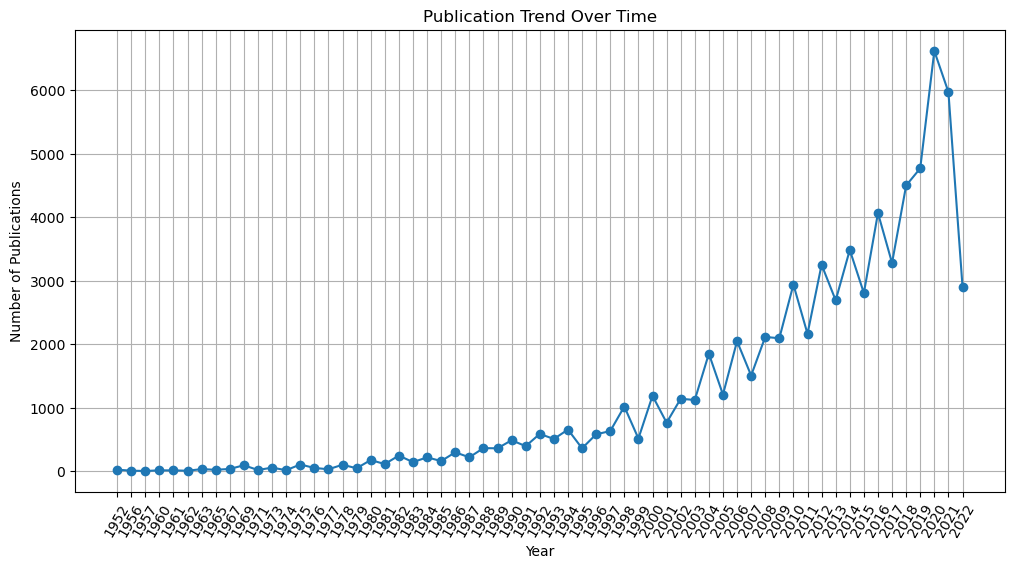

In [8]:
import matplotlib.pyplot as plt

yearly_publications = df['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_publications.index, yearly_publications.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.title('Publication Trend Over Time')
plt.xticks(rotation=60)
plt.grid(True)
plt.show()

Full_text column: this would probably be an essential part where we derive our citation network.

In [11]:
sample_full_text = df.loc[2, 'full_text']
sample = sample_full_text.lower().strip()
sample

'thread disentanglement is the task of separating out conversations whose thread structure is implicit, distorted, or lost. in this paper, we perform email thread disentanglement through pairwise classification, using text similarity measures on non-quoted texts in emails. we show that i) content text similarity metrics outperform style and structure text similarity metrics in both a class-balanced and class-imbalanced setting, and ii) although feature performance is dependent on the semantic similarity of the corpus, content features are still effective even when controlling for semantic similarity. we make available the enron threads corpus, a newly-extracted corpus of 70,178 multiemail threads with emails from the enron email corpus. introduction law enforcement agencies frequently obtain large amounts of electronic messages, such as emails, which they must search for evidence. however, individual messages may be useless without the conversational context they occur in. most modern 